In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

In [3]:
df = pd.read_csv("voice-classification.csv",sep=",",header="infer")

In [5]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


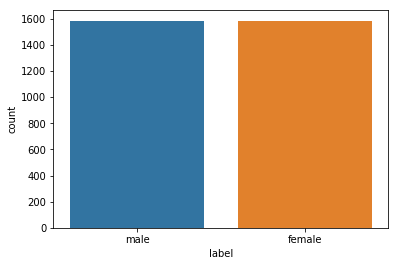

In [12]:
sns.countplot(df['label'],label="Count")
plt.show()

In [25]:
df['label'] = pd.Categorical(df.label)

In [32]:
#encoding categorical values using pandas cat codes
df['label'] = df.label.astype("category").cat.codes

# Splitting data

In [33]:
train,test = train_test_split(df,test_size=0.2,random_state=85)

In [34]:
train.shape

(2534, 21)

In [35]:
test.shape

(634, 21)

In [38]:
len(train.columns)

21

In [41]:
x_train = train.iloc[:,0:20]
x_test = test.iloc[:,0:20]
y_train = train['label']
y_test = test['label']

# Applying Naive Bayes Algorithm on the data

In [42]:
gnb = GaussianNB()

In [44]:
y_pred = gnb.fit(x_train,y_train).predict(x_test)

In [47]:
print(metrics.accuracy_score(y_pred,y_test))

0.8801261829652997


# Plotting confusion matrix

In [49]:
from sklearn.metrics import confusion_matrix
cnf_matrix_gnb = confusion_matrix(y_test,y_pred)
print(cnf_matrix_gnb)

[[274  34]
 [ 42 284]]


In [55]:
print("Number of mislabeled points out of a total %d points : %d" % (test.shape[0],(y_test != y_pred).sum()))

Number of mislabeled points out of a total 634 points : 76


# Applying Support Vector Machines on the data

In [56]:
from sklearn import svm

In [61]:
model = svm.SVC(kernel='linear')

In [62]:
model_pred = model.fit(x_train,y_train).predict(x_test)

In [63]:
print(metrics.accuracy_score(model_pred,y_test))

0.9227129337539433


Got Accuracy of 88% on 